# Задание №2

## Способы борьбы с несбалансированными данными и почему с ними нужно бороться

Выборку называют несбалансированной, когда объектов одного из классов намного меньше, чем объектов остальных классов. К примеру, выборка в задаче классификации больных и здоровых будет несбалансирована (здоровых людей намного больше больных), или выборка в задаче предсказания оттока клиентов (отток клиентов существенно ниже, чем действующих клиентов) и т.д. 

Проблема несбалансированных данных заключается в том, что модели-классификаторы пытаются минимизировать число неправильных ответов и не учитывают цену каждой ошибки. Таким образом, может возникнуть ситуация, когда можно просто предсказывать наиболее популярный класс, чтобы достичь наибольшей точности. 

Сейчас, мне известны три способа борьбы с несбалансированной выборкой: undersampling, oversampling, штрафные модели.
- Undersampling. Этот метод заключается в удалении объектов из наиболее популярных классов, пока их количество примерно не сравняется с количеством объектов непопулярного класса. Плюс этого метода кроется в его простоте, к тому же удаление случайных данных никак не скажется на самом процессе классификации. Недостаток же кроется в опасности недообучения модели, когда данных может не хватить.
- Oversampling. Oversampling заключается в добавлении объектов в классы меньшим объемом. Фишка этого метода - это существование нескольких способов: дублирование исходных объектов класса или добавление синтетически созданных новых объектов. Очевидно, что при правильном создании синтетических данных, модель будет более точной, притом что риск переобучения будет ниже.
- Весовые модели. Так как в несбалансированных данных классификаторы обычно не учитывают цену ошибки, добавление штрафов (весов) для каждого класса может помочь модели балансировать классы между собой.

Рассмотрим эти методы на практике, на примере датасета Credit Card Fraud Detection из Kaggle. Для оценки результатов каждого метода будем использовать метрики accuracy_score (доля правильных ответов), precision_score (точность), recall_score (полнота), f1_score (среднее гармоническое precision и recall), precision_recall_curve (площадь под кривой ошибок),  confusion_matrix (матрица ошибок). 
Для того, чтобы не выбирать сразу между несколькими классификаторами, сразу укажем две модели, которыми будем пользоваться: RandomForestClassifier и LogisticRegression. 

## Credit Card Fraud Detection

Идентификация мошеннических транзакций

### Изучение и подготовка данных

In [1]:
# импорт библиотек для первичного анализа данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# импорт датасета
data = pd.read_csv('creditcard.csv') 

In [2]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


- Time: секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных
- Amount: сумма транзакции
- Class: мошенничество - 1, в противном случае - 0 
- V1..V28: переменные после уменьшения размерности

In [3]:
data.shape[0]

284807

In [4]:
# баланс классов
data['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Посмотрим на значения Amount для разных классов
data_fraud = data[data['Class'] == 1]
data_normal = data[data['Class'] == 0]
print(data_fraud['Amount'].describe(), '\n')
print(data_normal['Amount'].describe(), '\n')

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64 

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64 



Text(0, 0.5, 'Amount')

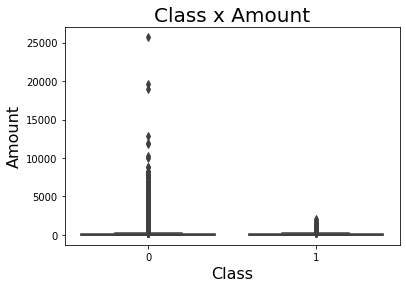

In [7]:
ax = sns.boxplot(x ='Class',y='Amount', data=data)
ax.set_title('Class x Amount', fontsize=20)
ax.set_xlabel('Class', fontsize=16)
ax.set_ylabel('Amount', fontsize = 16)

In [8]:
data = data[data['Amount'] < 10000]

In [9]:
# стандартизация Amount 
from sklearn.preprocessing import StandardScaler
data['scaled_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

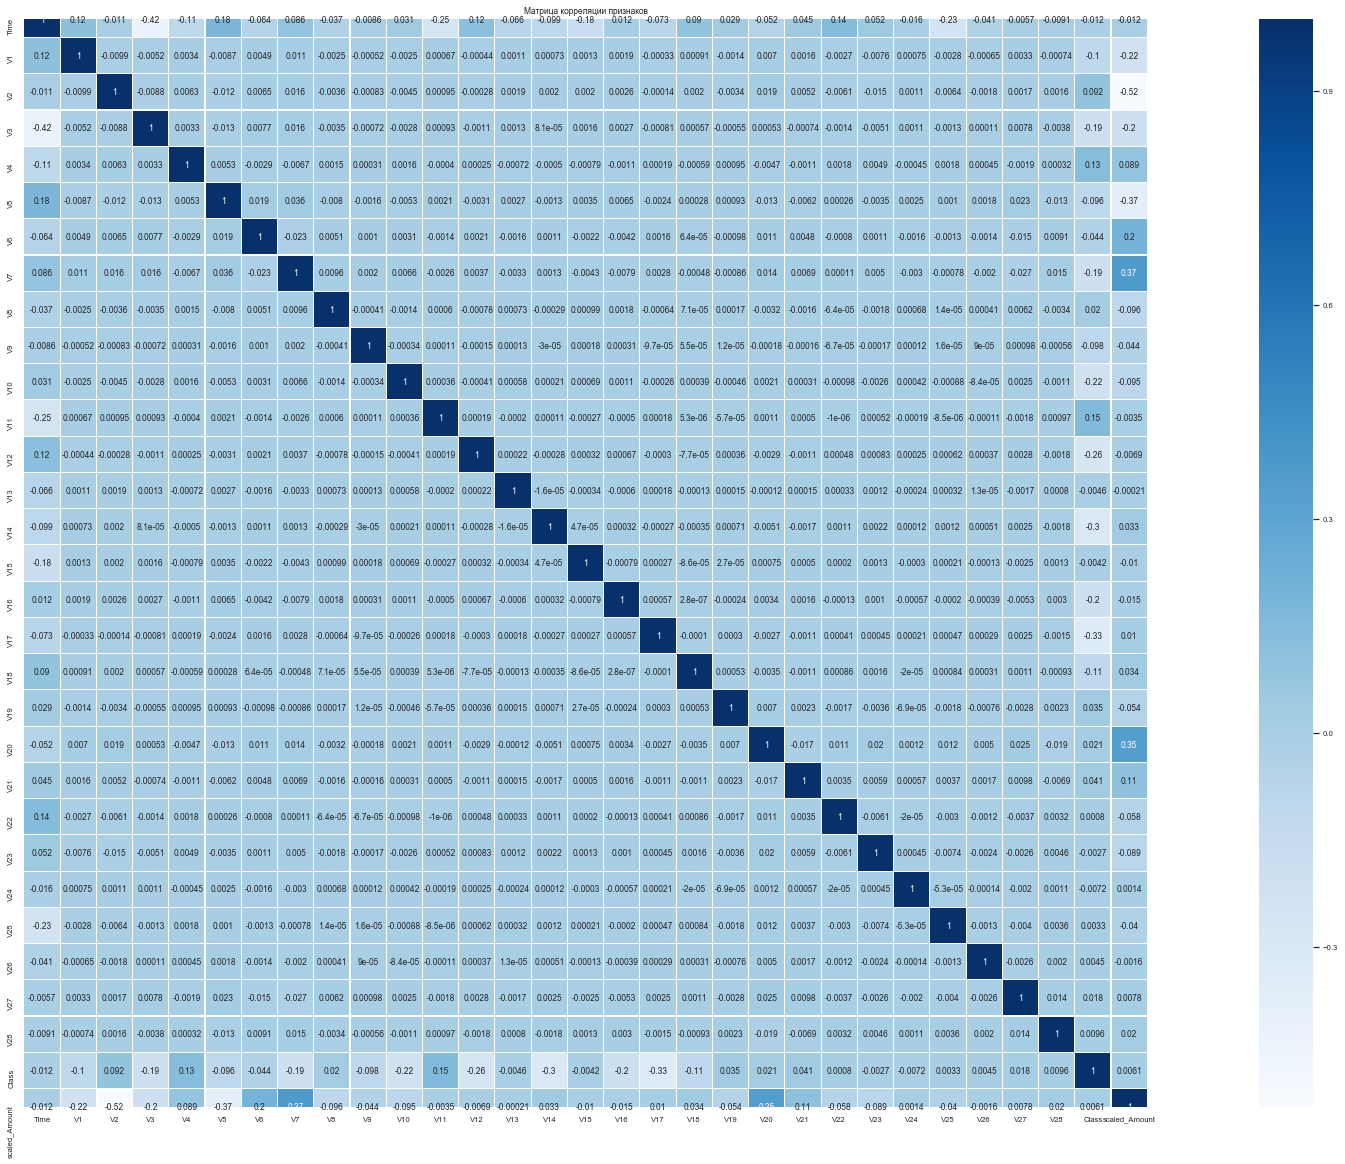

In [10]:
colormap = plt.cm.Blues

plt.figure(figsize=(40,20))

sns.set(font_scale=0.7)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.title('Матрица корреляции признаков')
plt.show()

### Подготовка к классификации

In [11]:
# метрики
from sklearn.metrics import accuracy_score, f1_score, auc, precision_recall_curve, precision_score, recall_score, confusion_matrix
def print_results(model, true_value, pred, score):
    # модель
    print(type(model).__name__)
    # значения метрик
    print('Confusion Matrix:\n', confusion_matrix(true_value,pred))
    print('accuracy: {}'.format(accuracy_score(true_value, pred)))
    print('precision: {}'.format(precision_score(true_value, pred)))
    print('recall: {}'.format(recall_score(true_value, pred)))
    print('f1 score: {}'.format(f1_score(true_value, pred)))
    # кривая ROC
    precision, recall, threshold = precision_recall_curve(true_value, score) 
    pr_auc = auc(recall, precision)
    plt.title('Precision Recall Curve')
    plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

In [12]:
# импорт классификаторов
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB

classifiers = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(max_depth = 5, n_estimators = 20),
#     'KNeighborsClassifier': KNeighborsClassifier(),
#     'GaussianNB': GaussianNB()
}

In [13]:
# определение признаковых переменных и целевой переменной
X = data.drop(['Time', 'Class'], axis=1)
y = data['Class']

In [14]:
# разделение на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, shuffle=True)

Для начала посмотрим, как работают наши классификаторы при несбалансированных данных.

--------------------------------------------------------------------------------
LogisticRegression
Confusion Matrix:
 [[56858     4]
 [   41    57]]
accuracy: 0.9992099719101124
precision: 0.9344262295081968
recall: 0.5816326530612245
f1 score: 0.7169811320754718


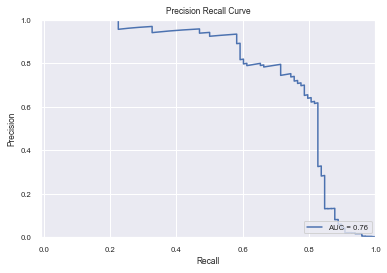

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
RandomForestClassifier
Confusion Matrix:
 [[56858     4]
 [   27    71]]
accuracy: 0.9994557584269663
precision: 0.9466666666666667
recall: 0.7244897959183674
f1 score: 0.8208092485549132


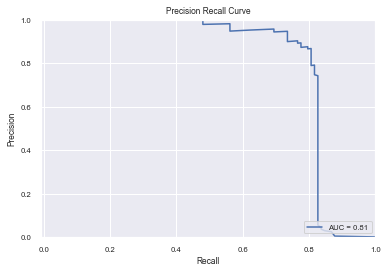

--------------------------------------------------------------------------------


In [15]:
for key, model in classifiers.items():
    print('----'*20)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score = model.predict_proba(X_test)
    score = score[:,1]
    print_results(model, y_test, prediction, score)
    print('----'*20)

RFC оказался чуть более точным, чем LR (т.е. менее чувствительным к несбалансированной выборке), однако обе модели далеки от совершенства.

#### - Undersampling

In [16]:
# балансирование классов с помощью удаления значений большего класса
data = data.sample(frac=1) # перемешивание
 
fraud = data.loc[data['Class'] == 1]
normal = data.loc[data['Class'] == 0][:492]

new_data = pd.concat([fraud, normal])
us_data = new_data.sample(frac=1, random_state=42)
us_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount
137840,82351.0,-0.350589,1.099719,1.869152,2.887081,0.350494,-0.345750,0.401509,-0.027318,-1.546851,...,-0.097141,-0.371550,0.110041,0.347653,-0.681972,-0.100579,0.159577,0.174324,0,-0.352218
18773,29753.0,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,...,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,1,-0.370611
108936,71140.0,1.258151,0.371104,0.311112,0.690954,-0.354016,-1.069178,0.098485,-0.214425,0.003798,...,-0.285950,-0.813841,0.127883,0.350530,0.222834,0.093861,-0.021660,0.031077,0,-0.369719
183106,125658.0,0.224414,2.994499,-3.432458,3.986519,3.760233,0.165640,1.099378,-0.654557,-2.435416,...,0.491337,-0.984223,-0.421979,-1.048058,0.726412,0.268625,0.283689,0.419102,1,-0.373500
163149,115691.0,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,-0.978626,...,0.802316,1.037105,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820,1,-0.301032


In [17]:
# определение признаковых переменных и целевой переменной для андерсэмплинга
X_us = us_data.drop(['Time', 'Class'], axis=1)
y_us = us_data['Class']

In [18]:
# разделение на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split

X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(X_us, y_us, test_size = 0.2, random_state = 8, shuffle=True)

В случае ресэмплинга, важно, чтобы проверка обученной модели проводится на полной выборке, так как наша модель должна показывать точные результаты при работе с реальными данными.

--------------------------------------------------------------------------------
LogisticRegression
Confusion Matrix:
 [[54543  2319]
 [    7    91]]
accuracy: 0.9591643258426966
precision: 0.03775933609958506
recall: 0.9285714285714286
f1 score: 0.07256778309409888


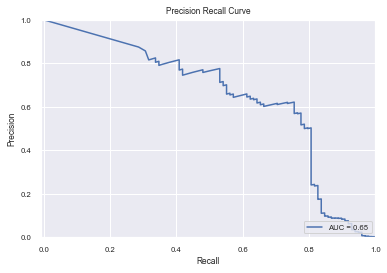

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
RandomForestClassifier
Confusion Matrix:
 [[55790  1072]
 [   10    88]]
accuracy: 0.981004213483146
precision: 0.07586206896551724
recall: 0.8979591836734694
f1 score: 0.13990461049284578


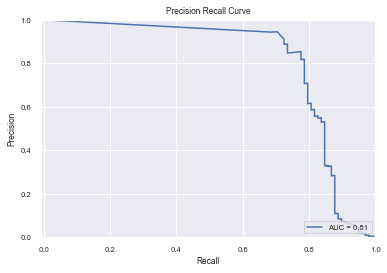

--------------------------------------------------------------------------------


In [19]:
for key, classifier_us in classifiers.items():
    print('----'*20)
    classifier_us.fit(X_us_train, y_us_train)
    prediction = classifier_us.predict(X_test)
    score = classifier_us.predict_proba(X_test)
    score = score[:,1]
    print_results(classifier_us, y_test, prediction, score)
    print('----'*20)

#### - Oversampling

In [20]:
# импортируем библиотеки для добавления синтетических данных
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

In [21]:
ada = ADASYN(sampling_strategy='minority')
X_res_ada, y_res_ada = ada.fit_resample(X,y)
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res_ada, y_res_ada, test_size = 0.2, random_state = 8, shuffle=True)

--------------------------------------------------------------------------------
LogisticRegression
Confusion Matrix:
 [[51415  5447]
 [    4    94]]
accuracy: 0.9043012640449438
precision: 0.016964446850748962
recall: 0.9591836734693877
f1 score: 0.03333924454690548


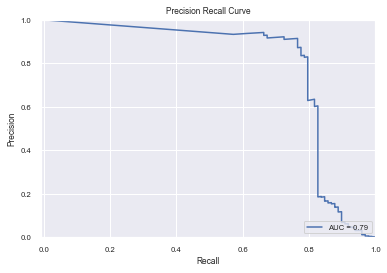

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
RandomForestClassifier
Confusion Matrix:
 [[53983  2879]
 [    5    93]]
accuracy: 0.9493679775280899
precision: 0.031292059219380886
recall: 0.9489795918367347
f1 score: 0.06058631921824104


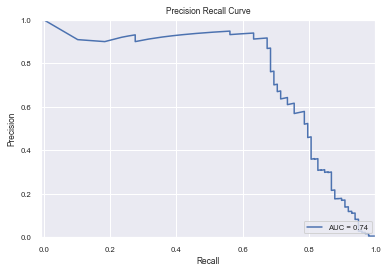

--------------------------------------------------------------------------------


In [27]:
for key, classifier_ada in classifiers.items():
    print('----'*20)
    classifier_ada.fit(X_res_train, y_res_train)
    prediction = classifier_ada.predict(X_test)
    score = classifier_ada.predict_proba(X_test)
    score = score[:,1]
    print_results(classifier_ada, y_test, prediction, score)
    print('----'*20)

In [23]:
smote = SMOTE(sampling_strategy='minority')
X_res_smote, y_res_smote = smote.fit_resample(X,y)
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_res_smote, y_res_smote, test_size = 0.2, random_state = 8, shuffle=True)

--------------------------------------------------------------------------------
LogisticRegression
Confusion Matrix:
 [[55405  1457]
 [    8    90]]
accuracy: 0.9742801966292135
precision: 0.058177117000646414
recall: 0.9183673469387755
f1 score: 0.1094224924012158


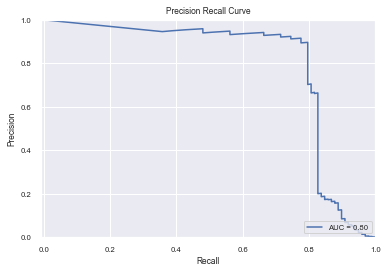

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
RandomForestClassifier
Confusion Matrix:
 [[56654   208]
 [   11    87]]
accuracy: 0.9961551966292135
precision: 0.29491525423728815
recall: 0.8877551020408163
f1 score: 0.44274809160305345


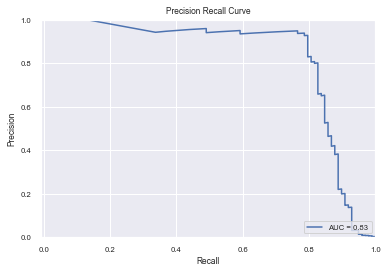

--------------------------------------------------------------------------------


In [28]:
for key, classifier_smote in classifiers.items():
    print('----'*20)
    classifier_smote.fit(X_smote_train, y_smote_train)
    prediction = classifier_smote.predict(X_test)
    score = classifier_smote.predict_proba(X_test)
    score = score[:,1]
    print_results(classifier_smote, y_test, prediction, score)
    print('----'*20)

#### - Весовые модели

LogisticRegression
Confusion Matrix:
 [[56597   265]
 [   16    82]]
accuracy: 0.995066713483146
precision: 0.23631123919308358
recall: 0.8367346938775511
f1 score: 0.36853932584269666


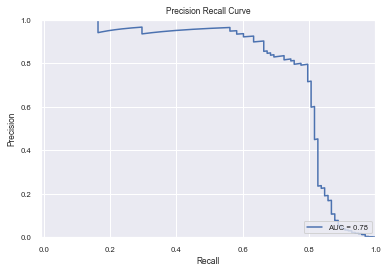

In [26]:
LR = LogisticRegression(class_weight={0:1,1:100})
LR.fit(X_train, y_train)
prediction = LR.predict(X_test)
score = LR.predict_proba(X_test)
score = score[:,1]
print_results(LR, y_test, prediction, score)

RandomForestClassifier
Confusion Matrix:
 [[56794    68]
 [   17    81]]
accuracy: 0.9985077247191011
precision: 0.5436241610738255
recall: 0.826530612244898
f1 score: 0.6558704453441295


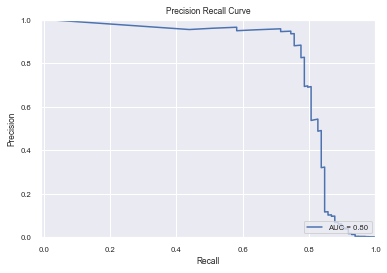

In [25]:
# Так как число мошенников примерно в 600 раз меньше, чем обычных людей, 
# поставим весы для первого класса 1, для второго - 600
RFC = RandomForestClassifier(class_weight={0:1,1:600}, max_depth = 5, n_estimators = 20)
RFC.fit(X_train, y_train)
prediction = RFC.predict(X_test)
score = RFC.predict_proba(X_test)
score = score[:,1]
print_results(RFC, y_test, prediction, score)

## Заключение

Первое,что хотелось бы отметить - это то, что RandomForestClassifier даже без методов борьбы с несбалансированной выборкой выдает неплохие результаты (точность выявления мошенников (recall) равна 0.7245), тогда как логистическая регрессия разделила не мошенников и не смогла разделить второй класс от первого (recall почти равна 0.6). Таким образом, для работы с несбалансированными данными вполне неплохо работать со случайным лесом. 

Undersampling - достаточно неплохий методы для борьбы с дисбалансом классов. Обе модели минимизировали ошибки при выявлении мошеннических транзакций (LR: recall = 0.898, RFC: recall = 0.926), однако при этом существенно ошибались для тех, кто не оказался мошенником, что и показывает уменьшение precision (и, соответственно, f1 score). Однако учитывая простоту и скорость реализации метода, а также то, что цена ошибки для немошенников меньше, использование андерсэмплинга вполне годно. 

С методом oversampling все оказалось более очевидно. Использовались два разных метода синтезирования объектов (SMOTE и ADASYN), которые ресэмплировали объекты меньшего класса. Увеличение количества мошенников и их синтетически созданных дублеров положительно сказалось на способности логистической регрессии предсказывать плохие транзакции, однако вместе с тем и существенно уменьшилась способность отличать уже обычные транзакции от мошеннических (об этом говорит уменьшение метрики precision и общее уменьшение f1 score). Модель деревьев же показал неплохой результат.

Третий же метод борьбы - штрафование - оказался наиболее предпочтительным, так как одновременно с увеличением вероятности угадать мошенника, уменьшаются и ошибки на обычных транзакциях для обеих моделей. 